## Face Shape Classification Analysis and Modeling

In this Jupyter Notebook we will analyze a data set of faces labeled by face shape and train a model to identify face shapes.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read data
data = pd.read_csv('face_shape_classification.csv')
data.head()

,image_name,image_original,face_height_to_width,face_height_to_chin_height,face_width_to_jaw_width,face_width_to_eyes_width,eyes_width_to_jaw_width,face_height_to_forehead_height,chin_height_to_forehead_height,face_width_to_forehead_width,...,feature_square,features_edge_enhance,features_gray,features_rotate1,features_rotate2,features_flip_LR,features_equalize,features_autoContrast,features_posterize,face_type
0,heart_agreene_003.jpg,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgH...,1.233624,5.270820,1.099922,3.667903,0.299878,2.879426,0.546296,1.013412,...,"[1.2336235523596562, 5.270819524660133, 1.0999...","[1.26662425634217, 5.278070167339387, 1.086938...","[1.2331040662742303, 5.270819524660133, 1.0990...","[1.2154888171733145, 5.225256290681186, 1.0989...","[1.2091250849578716, 5.1929243605731585, 1.102...","[1.2186273271258408, 5.282454068674362, 1.0985...","[1.2331040662742303, 5.278947238855233, 1.0998...","[1.2336235523596562, 5.270819524660133, 1.0999...","[1.2323778870614657, 5.278947238855233, 1.1004...",heart
1,heart_agreene_004.jpg,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgH...,1.231720,5.668185,1.077668,3.636069,0.296383,2.826287,0.498623,0.971972,...,"[1.231719653766351, 5.668184769753964, 1.07766...","[1.2167280083335574, 5.99153379005413, 1.09583...","[1.2159046076931286, 5.601832822697526, 1.0971...","[1.2181066389211512, 5.582646224204864, 1.0959...","[1.204925002767841, 5.780987054193662, 1.09905...","[1.1959548242526388, 5.589180445566, 1.0956227...","[1.2159046076931286, 5.601832822697526, 1.0971...","[1.2, 5.601832822697526, 1.0944012096951012, 3...","[1.2173011052230533, 5.601832822697526, 1.0788...",heart
2,heart_agreene_038.jpg,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgH...,1.195487,6.512462,1.119245,3.483188,0.321328,2.829554,0.434483,0.987379,...,"[1.195487112158461, 6.512462066082395, 1.11924...","[1.195487112158461, 6.512462066082395, 1.11924...","[1.2120523868046391, 6.09936981488484, 1.11784...","[1.22497261650232, 7.613508865259127, 1.121921...","[1.211372520127423, 6.184538843766702, 1.13606...","[1.2162822928256138, 6.174425431711415, 1.1396...","[1.2120523868046391, 6.594428442745171, 1.1192...","[1.195487112158461, 6.512462066082395, 1.11924...","[1.2120523868046391, 6.09936981488484, 1.11928...",heart
3,heart_agreene_047.jpg,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgH...,1.277319,5.375646,1.097880,3.740924,0.293478,2.860661,0.532152,1.000000,...,"[1.2773186112862704, 5.375645956017234, 1.0978...","[1.287065629149688, 5.411970812583573, 1.10987...","[1.2646831042425826, 5.370501624147785, 1.1086...","[1.2646210816167391, 5.513952278064314, 1.1135...","[1.2848896942008785, 5.3045747721672765, 1.100...","[1.2781867609788384, 5.379035952452612, 1.1098...","[1.2900905265303422, 5.375645956017234, 1.0988...","[1.2773186112862704, 5.375645956017234, 1.0978...","[1.2899742620069345, 4.958021714407042, 1.1110...",heart
4,heart_agreene_068.jpg,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgH...,1.249968,5.824616,1.105246,3.652433,0.302605,2.915674,0.500578,1.024463,...,"[1.2499681163568706, 5.824616197326125, 1.1052...","[1.2616033685315227, 5.8800837252019305, 1.091...","[1.2499681163568706, 5.824616197326125, 1.1052...","[1.2369355739342296, 5.724046285832509, 1.0927...","[1.2426035063816516, 5.720727814424204, 1.1060...","[1.251327763005775, 5.8309518948453, 1.1052458...","[1.2650258004333248, 5.833597877599284, 1.0920...","[1.2499681163568706, 5.824616197326125, 1.1052...","[1.2354326928470112, 5.8254085363504435, 1.118...",heart


### Data Cleaning

In [84]:
data.isna().sum()

image_name                        0
image_original                    0
face_height_to_width              0
face_height_to_chin_height        0
face_width_to_jaw_width           0
face_width_to_eyes_width          0
eyes_width_to_jaw_width           0
face_height_to_forehead_height    0
chin_height_to_forehead_height    0
face_width_to_forehead_width      0
forehead_width_to_jaw_width       0
eyes_width_to_forehead_width      0
face_height_to_nose_height        0
chin_height_to_nose_height        0
forehead_height_to_nose_height    0
features_original                 0
feature_square                    0
features_edge_enhance             0
features_gray                     0
features_rotate1                  1
features_rotate2                  1
features_flip_LR                  0
features_equalize                 1
features_autoContrast             0
features_posterize                0
face_type                         0
dtype: int64

In [85]:
#drop na
data = data.dropna()
#Total entries in data
data.shape[0]

498

In [86]:
import warnings
warnings.filterwarnings("ignore")

**Comparison of facial height/width ratio across face types.**

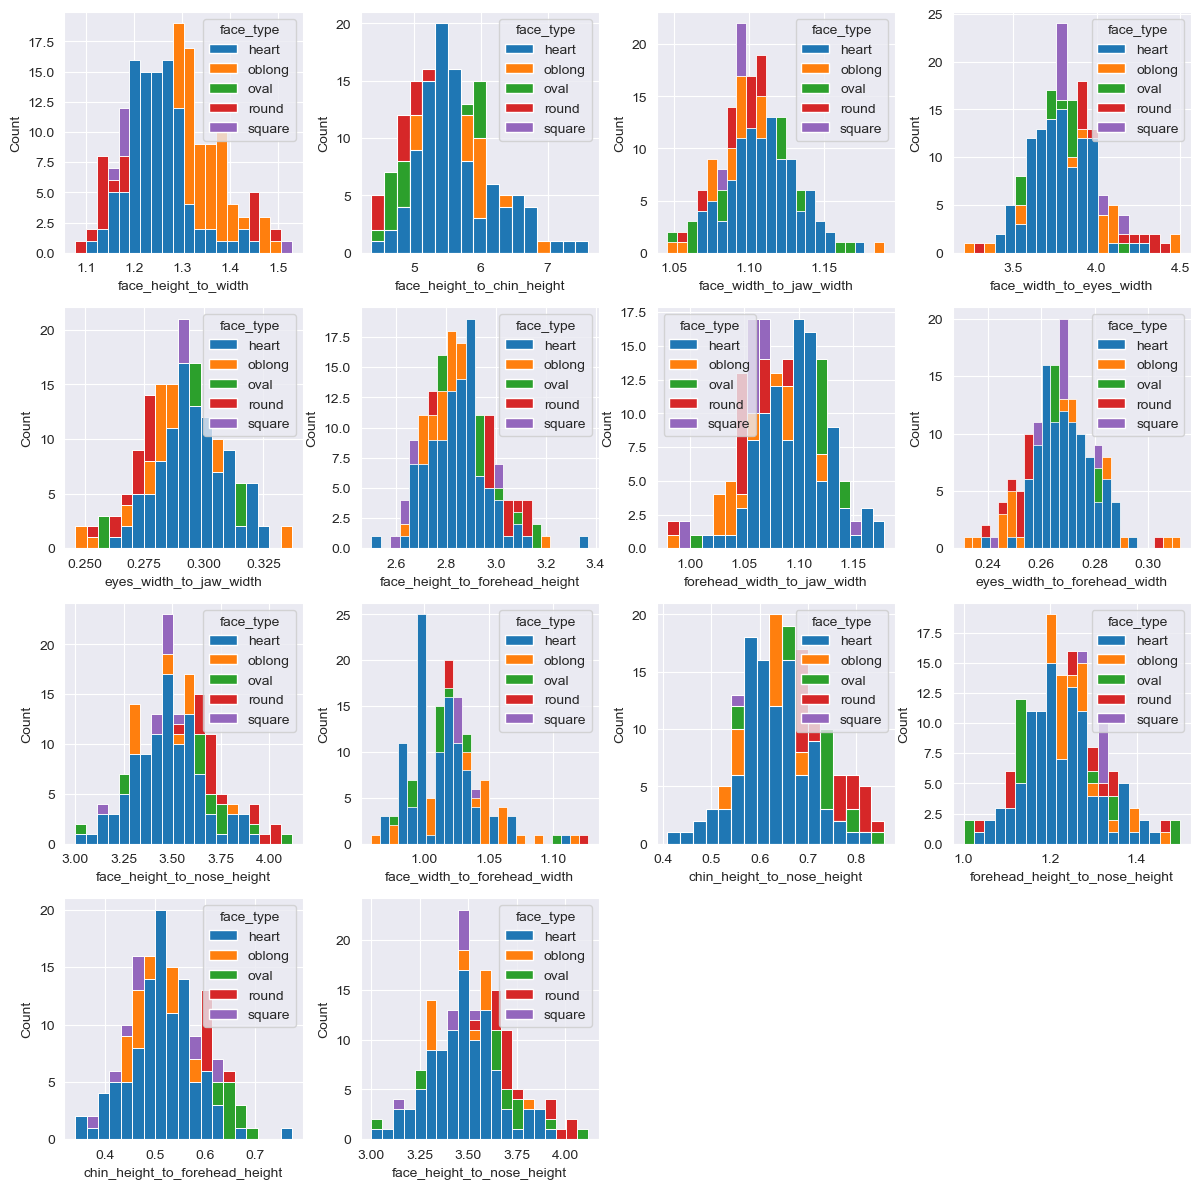

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12,12))
sns.set_style('darkgrid')

sns.histplot(x= data['face_height_to_width'].apply(lambda x : round(x, 3)), hue=data['face_type'], ax=axes[0,0], alpha=1)
sns.histplot(x= data['face_height_to_chin_height'].apply(lambda x : round(x, 3)), hue=data['face_type'], ax=axes[0,1], alpha=1)
sns.histplot(x= data['face_width_to_jaw_width'].apply(lambda x : round(x, 3)), hue=data['face_type'], ax=axes[0,2], alpha=1)
sns.histplot(x= data['face_width_to_eyes_width'].apply(lambda x : round(x, 3)), hue=data['face_type'], ax=axes[0,3], alpha=1)
sns.histplot(x= data['eyes_width_to_jaw_width'].apply(lambda x : round(x, 3)), hue=data['face_type'], ax=axes[1,0], alpha=1)
sns.histplot(x= data['face_height_to_forehead_height'].apply(lambda x : round(x, 3)), hue=data['face_type'], ax=axes[1,1], alpha=1)
sns.histplot(x= data['forehead_width_to_jaw_width'].apply(lambda x : round(x, 3)), hue=data['face_type'], ax=axes[1,2], alpha=1)
sns.histplot(x= data['eyes_width_to_forehead_width'].apply(lambda x : round(x, 3)), hue=data['face_type'], ax=axes[1,3], alpha=1)
sns.histplot(x= data['face_height_to_nose_height'].apply(lambda x : round(x, 3)), hue=data['face_type'], ax=axes[2,0], alpha=1)
sns.histplot(x= data['face_width_to_forehead_width'].apply(lambda x : round(x, 3)), hue=data['face_type'], ax=axes[2,1], alpha=1)
sns.histplot(x= data['chin_height_to_nose_height'].apply(lambda x : round(x, 3)), hue=data['face_type'], ax=axes[2,2], alpha=1)
sns.histplot(x= data['forehead_height_to_nose_height'].apply(lambda x : round(x, 3)), hue=data['face_type'], ax=axes[2,3], alpha=1)
sns.histplot(x= data['chin_height_to_forehead_height'].apply(lambda x : round(x, 3)), hue=data['face_type'], ax=axes[3,0], alpha=1)
sns.histplot(x= data['face_height_to_nose_height'].apply(lambda x : round(x, 3)), hue=data['face_type'], ax=axes[3,1], alpha=1)

plt.delaxes(axes[3,2])
plt.delaxes(axes[3,3])
plt.tight_layout()
plt.show()

<Axes: xlabel='face_height_to_width', ylabel='Count'>

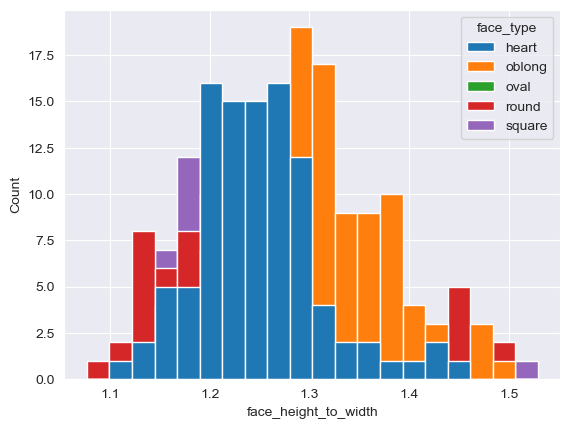

In [88]:
sns.histplot(x= data['face_height_to_width'].apply(lambda x : round(x, 3)), hue=data['face_type'], alpha=1)

In [89]:
means = {}

hearts = data[data['face_type'] == 'heart']
means['hearts'] = np.mean(hearts['face_height_to_width'])
oblongs = data[data['face_type'] == 'oblong']
means['oblongs'] = np.mean(oblongs['face_height_to_width'])
ovals = data[data['face_type'] == 'oval']
means['ovals'] = np.mean(ovals['face_height_to_width'])
rounds = data[data['face_type'] == 'round']
means['rounds'] = np.mean(rounds['face_height_to_width'])
squares = data[data['face_type'] == 'square']
means['squares'] = np.mean(squares['face_height_to_width'])
means

{'hearts': 1.2493869221109961,
 'oblongs': 1.3190069185462805,
 'ovals': 1.2718244390126254,
 'rounds': 1.2510838856171822,
 'squares': 1.2589885970764996}

**Comparing jaw width/face width ratio beween round, heart, and square faces.**

<Axes: xlabel='jaw_width_to_face_width', ylabel='Count'>

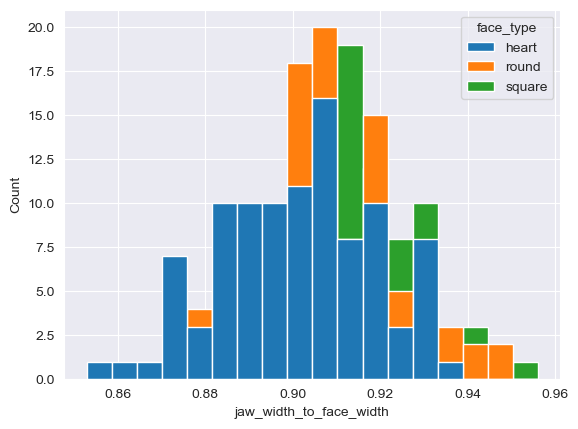

In [90]:
temp = data[data['face_type'].isin(['heart', 'round', 'square'])]
#get reciprocal of 'face-width/jaw-width
temp['jaw_width_to_face_width'] = data['face_width_to_jaw_width'].apply(lambda x : round(1/x, 3))
sns.histplot(x= temp['jaw_width_to_face_width'], hue= temp['face_type'], alpha=1)

In [91]:
means = {}

hearts = temp[temp['face_type'] == 'heart']
means['hearts'] = np.mean(hearts['jaw_width_to_face_width'])
rounds = temp[temp['face_type'] == 'round']
means['rounds'] = np.mean(rounds['jaw_width_to_face_width'])
squares = temp[temp['face_type'] == 'square']
means['squares'] = np.mean(squares['jaw_width_to_face_width'])
means

{'hearts': 0.90107,
 'rounds': 0.9090600000000001,
 'squares': 0.9112800000000001}

**Let's look at forehead width and jaw width. It is typical for heart faces to have a larger upper third and a smaller lower third (third refers to the common method of assessing facial features by dividing the face into thirds, see https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4762318/#:~:text=The%20face%20is%20divided%20into,the%20subnasale%20to%20the%20menton).**

<Axes: xlabel='forehead_width_to_jaw_width', ylabel='Count'>

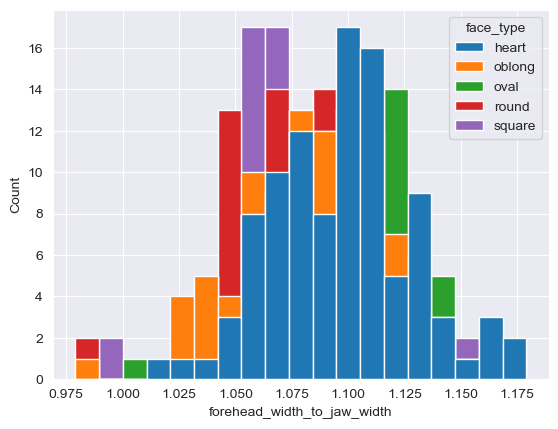

In [92]:
sns.histplot(x= data['forehead_width_to_jaw_width'].apply(lambda x : round(x, 3)), hue=data['face_type'], alpha=1)

In [93]:
means = {}

hearts = data[data['face_type'] == 'heart']
means['hearts'] = np.mean(hearts['forehead_width_to_jaw_width'])
oblongs = data[data['face_type'] == 'oblong']
means['oblongs'] = np.mean(oblongs['forehead_width_to_jaw_width'])
ovals = data[data['face_type'] == 'oval']
means['ovals'] = np.mean(ovals['forehead_width_to_jaw_width'])
rounds = data[data['face_type'] == 'round']
means['rounds'] = np.mean(rounds['forehead_width_to_jaw_width'])
squares = data[data['face_type'] == 'square']
means['squares'] = np.mean(squares['forehead_width_to_jaw_width'])
means

{'hearts': 1.0971122120437362,
 'oblongs': 1.0850589125686172,
 'ovals': 1.0941499617746497,
 'rounds': 1.0796549207397796,
 'squares': 1.0795958899720224}

**Next, let's look to distinguish oval and oblong faces by comparing forehead height/face height.**

<Axes: xlabel='forehead_height_to_face_height', ylabel='Count'>

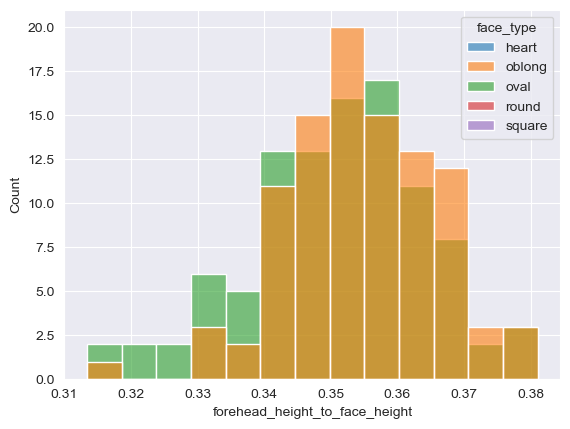

In [94]:
#Only look at oblong and oval faces
temp = data[data['face_type'].isin(['oblong', 'oval'])]
#take reciprocal of ratio and round float
temp['forehead_height_to_face_height'] = data['face_height_to_forehead_height'].apply(lambda x : round(1/x, 3))
sns.histplot(x= temp['forehead_height_to_face_height'], hue=data['face_type'], alpha=0.6)

In [95]:
means = {}

hearts = temp[temp['face_type'] == 'oblong']
means['oblongs'] = np.mean(hearts['forehead_height_to_face_height'])
rounds = temp[temp['face_type'] == 'oval']
means['ovals'] = np.mean(rounds['forehead_height_to_face_height'])
means

{'oblongs': 0.354887855399757, 'ovals': 0.35093287860353234}

**Results:** <br>
1. Oblongs and Ovals have a notably higher mean in their facial height/width ratio. This is as expected, as these faces are 
longer than they are wide.
2. As we can see, heart faces are much more prevalent in lower jaw widths.
However, heart mean heart ratio is comparable. Square faces see a notable higher mean (i.e. wider jaws relative to face width) than others.
3. As predicted, hearts have the highest forehead width/jaw width ratio.
4. Oblongs have a slightly larger forehead height respective of thie face height than ovals. 
<br><br>The model can pick up on these details.

**Features we are interested in:**

In [38]:
a = data.columns.get_loc('face_height_to_width')
b = data.columns.get_loc('forehead_height_to_nose_height') + 1

**We tried that. Let's try all features at once. Explode data across columns:**

In [39]:
features_start = data.columns.get_loc('features_original')
features_end = data.columns.get_loc('features_posterize') + 1
FEATURES_LEN = len(data['features_original'][0])

temp = pd.DataFrame(data.iloc[:, features_start:features_end])
temp = temp.map(lambda x : x.replace('[', '').replace(']', '').split(','))
temp = temp.map(lambda x : [float(y) for y in x])

In [40]:
features_start = data.columns.get_loc('features_original')
features_end = data.columns.get_loc('features_posterize') + 1
FEATURES_LEN = len(temp['features_original'][0])

col = []

for i in range(FEATURES_LEN*(features_end - features_start)):
    col.append('feature'+str(i))

df_exp = pd.DataFrame(columns=col)

for idx, row in temp.iterrows():
    df_exp.loc[idx] = [j for innerList in row.tolist() for j in innerList]

df_exp

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature33760,feature33761,feature33762,feature33763,feature33764,feature33765,feature33766,feature33767,feature33768,feature33769
0,1.233624,5.270820,1.099922,3.667903,0.299878,2.879426,0.546296,1.013412,1.085365,0.276292,...,0.609444,0.481278,0.0,0.0,0.0,0.0,0.184095,0.226874,2.027612,1.601204
1,1.231720,5.668185,1.077668,3.636069,0.296383,2.826287,0.498623,0.971972,1.108744,0.267314,...,0.529492,0.548288,0.0,0.0,0.0,0.0,0.170017,0.206962,2.376980,2.461362
2,1.195487,6.512462,1.119245,3.483188,0.321328,2.829554,0.434483,0.987379,1.133552,0.283470,...,0.964328,0.656297,0.0,0.0,0.0,0.0,0.188630,0.228629,3.176487,2.161833
3,1.277319,5.375646,1.097880,3.740924,0.293478,2.860661,0.532152,1.000000,1.097880,0.267314,...,0.556139,0.479299,0.0,0.0,0.0,0.0,0.180300,0.232582,2.149279,1.852322
4,1.249968,5.824616,1.105246,3.652433,0.302605,2.915674,0.500578,1.024463,1.078854,0.280488,...,0.666247,0.553920,0.0,0.0,0.0,0.0,0.171662,0.212077,2.451138,2.037883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.295841,5.258790,1.089258,3.805587,0.286226,2.920035,0.555267,1.016662,1.071407,0.267150,...,0.411245,0.396387,0.0,0.0,0.0,0.0,0.174249,0.226565,2.392778,2.306328
496,1.334358,4.747311,1.096626,3.793917,0.289048,3.034513,0.639207,1.000000,1.096626,0.263580,...,0.473400,0.436298,0.0,0.0,0.0,0.0,0.173195,0.224105,2.272528,2.094423
497,1.238502,5.573260,1.105093,3.937500,0.280659,2.784854,0.499681,0.999874,1.105232,0.253936,...,0.439865,0.388342,0.0,0.0,0.0,0.0,0.160064,0.200754,2.377473,2.098991
498,1.304221,5.455303,1.045702,3.539298,0.295455,2.996673,0.549314,0.999292,1.046442,0.282342,...,0.614155,0.492081,0.0,0.0,0.0,0.0,0.142400,0.189820,2.493716,1.998047


<hr>

### Classification Models

We will use:
1. Decision Tree
2. Random Forest
3. Gaussian NB
4. KNeighbor
5. SVC

In [41]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [42]:
from sklearn.model_selection import train_test_split

#Data into features and target
features = df_exp
target = data['face_type']

#train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=5)

In [43]:
#Train classifiers
clf_decision_tree = DecisionTreeClassifier(max_depth=200, random_state=0)
clf_decision_tree.fit(X_train, y_train)
clf_random_forest = RandomForestClassifier(max_depth=200, random_state=0)
clf_random_forest.fit(X_train, y_train)
clf_gaussian_nb = GaussianNB()
clf_gaussian_nb.fit(X_train, y_train)
clf_KNN = KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree')
clf_KNN.fit(X_train, y_train)
clf_SVC = SVC(gamma='auto')
clf_SVC.fit(X_train, y_train)
clf_ABC = AdaBoostClassifier(n_estimators=50, learning_rate=1)
clf_ABC.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

<hr>

### Testing the Model

A function to evaluate our model, thanks to Rafi Atha, his article is at: https://medium.com/analytics-vidhya/building-classification-model-with-python-9bdfc13faa4b

In [44]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred, average='micro')
    rec = metrics.recall_score(y_test, y_pred, average='micro')
    f1 = metrics.f1_score(y_test, y_pred, average='micro')
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    return {'accuracy': acc, 'precision': prec, 'recall score': rec, 'f1 score': f1, 'kappa': kappa}

In [45]:
# Evaluate Model
rf_eval_dec_tree = evaluate_model(clf_decision_tree, X_test, y_test)
rf_eval_dec_tree['classifier'] = 'Decision Tree'
rf_eval_rand_forest = evaluate_model(clf_random_forest, X_test, y_test)
rf_eval_rand_forest['classifier'] = 'Random Forest'
rf_eval_gaussian_nb = evaluate_model(clf_gaussian_nb, X_test, y_test)
rf_eval_gaussian_nb['classifier'] = 'Gaussian NB'
rf_eval_knn = evaluate_model(clf_KNN, X_test, y_test)
rf_eval_knn['classifier'] = 'KNeighbor'
rf_eval_ada = evaluate_model(clf_ABC, X_test, y_test)
rf_eval_ada['classifier'] = 'Ada Boost'

eval = pd.DataFrame([rf_eval_dec_tree, rf_eval_rand_forest, rf_eval_gaussian_nb,
                     rf_eval_knn, rf_eval_ada], columns=['classifier', 'accuracy', 'precision', 'recall score', 'f1 score', 'kappa'])
eval

,classifier,accuracy,precision,recall score,f1 score,kappa
0,Decision Tree,0.248,0.248,0.248,0.248,0.060000
1,Random Forest,0.448,0.448,0.448,0.448,0.310000
2,Gaussian NB,0.424,0.424,0.424,0.424,0.280000
3,KNeighbor,0.304,0.304,0.304,0.304,0.132291
4,Ada Boost,0.392,0.392,0.392,0.392,0.243992


In [46]:
#Reshape dataframe
df_hist = pd.DataFrame(columns= ['classifier', 'metric', 'score'])
for i in range(len(eval.index)):
    for j in range(1, len(eval.columns)):
        df_hist.loc[len(df_hist.index)] = [eval.iloc[i, 0], eval.columns[j], eval.iloc[i, j]]

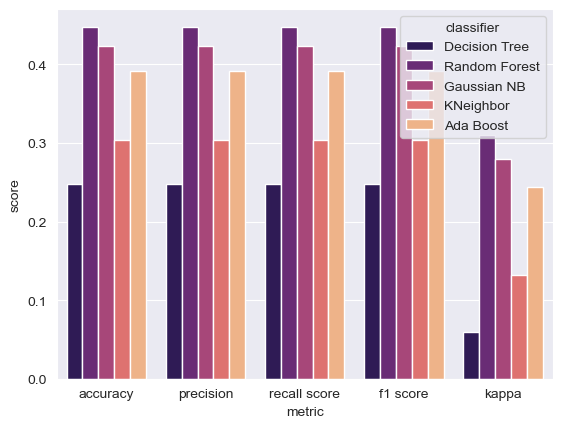

In [47]:
sns.barplot(x= 'metric', y='score', hue='classifier', data=df_hist,
            palette='magma')
sns.set_style('dark')

<hr>

### Let us take a break.

The data was gathered from Google Images, so it was not of the best quality, but we can do better.
So far, our data flows as such:

Google Images -> OpenCV Image Processing -> Facial Markers Calculation and Extraction -> Data Cleaning and Preprocessing -> Data Normalization -> Classifier

Moving forward, we will apply the following steps:
1. Check data for outliers
2. Normalize Data
3. Create a ML Pipeline for a more robust approach
4. Tune hyperparameters

<hr>

### 1. Check for Outliers

A histogram of the first feature and its outliers:

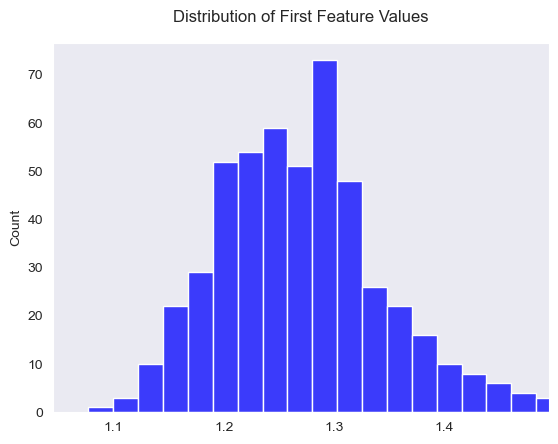

In [48]:
fig, ax = plt.subplots()
threshold = 3

x_val = df_exp.iloc[:, 0].values.tolist()

#plot histogram of std
sns.histplot(x = x_val, color='blue', ax=ax)
ax.set_title('Distribution of First Feature Values', pad=15)
three_std_down = np.mean(x_val) - 3*np.std(x_val)
three_std_up = np.mean(x_val) + 3*np.std(x_val)
ax.set_xlim(three_std_down, three_std_up)
plt.show()

In [49]:
print('The number of the first list of features above or below 3 standard deviation from mean: ' + str(len([j for j in x_val if (j > three_std_up or j < three_std_down)])))

The number of the first list of features above or below 3 standard deviation from mean: 3


In [52]:
from scipy import stats

threshold = 3

#replace outliers respective to each column with column median
for col in df_exp.columns:
    z = np.abs(stats.zscore(df_exp[col]))
    df_exp.loc[z > threshold, col] = df_exp[col].median()

In [53]:
x_val = df_exp.iloc[:, 0].values.tolist()
print('The number of the first list of features above or below 3 standard deviation from mean: ' + str(len([j for j in x_val if (j > three_std_up or j < three_std_down)])))

The number of the first list of features above or below 3 standard deviation from mean: 0


<hr>

### 3. Normalize Data

**First split data intro train/test.**

In [54]:
features = df_exp
target = data['face_type']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=1/5, random_state=0)

In [55]:
# Define a normalization function that scales values to [0, 1]
def normalize_column(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

# Apply the normalization function to each column of features
features = features.apply(normalize_column, axis=1)

In [56]:
#Features are normalized
features

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature33760,feature33761,feature33762,feature33763,feature33764,feature33765,feature33766,feature33767,feature33768,feature33769
0,0.233532,0.997798,0.208222,0.694356,0.056769,0.545092,0.103417,0.191845,0.205466,0.052304,...,0.115371,0.091109,0.0,0.0,0.0,0.0,0.034850,0.042949,0.383839,0.303118
1,0.205577,0.946032,0.179865,0.606868,0.049467,0.471713,0.083221,0.162224,0.185052,0.044615,...,0.088373,0.091511,0.0,0.0,0.0,0.0,0.028376,0.034542,0.396723,0.410807
2,0.181287,0.987570,0.169726,0.528202,0.048727,0.429083,0.065886,0.149729,0.171895,0.042986,...,0.146234,0.099523,0.0,0.0,0.0,0.0,0.028604,0.034670,0.481692,0.327827
3,0.231652,0.974917,0.199109,0.678447,0.053225,0.518804,0.096510,0.181358,0.199109,0.048479,...,0.100860,0.086925,0.0,0.0,0.0,0.0,0.032699,0.042181,0.389789,0.335934
4,0.212577,0.990567,0.187964,0.621153,0.051463,0.495856,0.085131,0.174226,0.183476,0.047701,...,0.113306,0.094203,0.0,0.0,0.0,0.0,0.029194,0.036067,0.416854,0.346574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.229933,0.933116,0.193277,0.675261,0.050788,0.518129,0.098526,0.180396,0.190110,0.047403,...,0.072971,0.070335,0.0,0.0,0.0,0.0,0.030919,0.040202,0.424573,0.409233
496,0.252239,0.897403,0.207299,0.717179,0.054640,0.573626,0.120832,0.189034,0.207299,0.049826,...,0.089489,0.082475,0.0,0.0,0.0,0.0,0.032740,0.042363,0.429585,0.395917
497,0.203739,0.916825,0.181793,0.647735,0.046170,0.458120,0.082200,0.164484,0.181815,0.041774,...,0.072360,0.063884,0.0,0.0,0.0,0.0,0.026331,0.033025,0.391104,0.345293
498,0.238974,0.999584,0.191606,0.648511,0.054137,0.549085,0.100652,0.183102,0.191741,0.051734,...,0.112533,0.090165,0.0,0.0,0.0,0.0,0.026092,0.034781,0.456928,0.366105


<hr>

### 4. Create ML Pipeline

Create the pipeline:

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline

pipe = Pipeline([('clf', RandomForestClassifier(random_state=0))])
pipe

Pipeline(steps=[('clf', RandomForestClassifier(random_state=0))])

In [58]:
pipe.fit(X_train, y_train)
 
rf_eval_pipeline = evaluate_model(pipe, X_test, y_test)
rf_eval_pipeline['classifier'] = 'Pipeline'

eval.loc[len(eval.index)] = rf_eval_pipeline
eval

,classifier,accuracy,precision,recall score,f1 score,kappa
0,Decision Tree,0.248,0.248,0.248,0.248,0.060000
1,Random Forest,0.448,0.448,0.448,0.448,0.310000
2,Gaussian NB,0.424,0.424,0.424,0.424,0.280000
3,KNeighbor,0.304,0.304,0.304,0.304,0.132291
4,Ada Boost,0.392,0.392,0.392,0.392,0.243992
5,Pipeline,0.480,0.480,0.480,0.480,0.342604


### 5. Tune Hyperparameters

In [ ]:
pipe.get_params()

{'memory': None,
 'steps': [('clf', RandomForestClassifier(random_state=0))],
 'verbose': False,
 'clf': RandomForestClassifier(random_state=0),
 'clf__bootstrap': True,
 'clf__ccp_alpha': 0.0,
 'clf__class_weight': None,
 'clf__criterion': 'gini',
 'clf__max_depth': None,
 'clf__max_features': 'sqrt',
 'clf__max_leaf_nodes': None,
 'clf__max_samples': None,
 'clf__min_impurity_decrease': 0.0,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 2,
 'clf__min_weight_fraction_leaf': 0.0,
 'clf__n_estimators': 100,
 'clf__n_jobs': None,
 'clf__oob_score': False,
 'clf__random_state': 0,
 'clf__verbose': 0,
 'clf__warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rs_space={'clf__max_depth':list(np.arange(10, 110, step=11)) + [None],
              'clf__n_estimators':np.arange(200, 2000, step=10),
              'clf__max_features':['auto', 'sqrt'],
              'clf__min_samples_split':[2, 5, 10],
              'clf__min_samples_leaf':[1, 2, 4],
              'clf__bootstrap':[True, False],
              'clf__criterion':['gini','entropy'],
              'clf__random_state': [j for j in range(50)]
          }

rf_random = RandomizedSearchCV(pipe, rs_space, n_iter=500, n_jobs=-1, cv=3)
rf_random.fit(X_train, y_train)

rf_random_eval = evaluate_model(rf_random, X_test, y_test)
rf_random_eval['classifier'] = 'RandomSearchCV'

eval.loc[len(eval.index)] = rf_random_eval
eval

,classifier,accuracy,precision,recall score,f1 score,kappa
0,Decision Tree,0.336,0.336,0.336,0.336,0.165393
1,Random Forest,0.368,0.368,0.368,0.368,0.209810
2,Gaussian NB,0.336,0.336,0.336,0.336,0.173175
3,KNeighbor,0.264,0.264,0.264,0.264,0.088315
4,Ada Boost,0.352,0.352,0.352,0.352,0.189222
5,Pipeline,0.410,0.410,0.410,0.410,0.267263
6,RandomSearchCV,0.400,0.400,0.400,0.400,0.251777


In [ ]:
rf_random.best_params_

{'clf__random_state': 30,
 'clf__n_estimators': 620,
 'clf__min_samples_split': 5,
 'clf__min_samples_leaf': 2,
 'clf__max_features': 'sqrt',
 'clf__max_depth': 32,
 'clf__criterion': 'gini',
 'clf__bootstrap': True}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'clf__random_state': [20, 30, 40, 50],
            'clf__n_estimators': [550, 575, 620, 650, 700],
            'clf__min_samples_split': [4, 5, 6, 7, 8],
            'clf__min_samples_leaf': [1, 2, 3, 4],
            'clf__max_depth': [20, 32, 40, 50]}

grid_search = GridSearchCV(estimator = pipe, param_grid = param_grid, 
                          cv = 3, n_jobs = -1)

grid_search.fit(X_train, y_train)

gs_eval = evaluate_model(grid_search, X_test, y_test)
gs_eval['classifier'] = 'GridSearch'

eval.loc[len(eval.index)] = gs_eval
eval

,classifier,accuracy,precision,recall score,f1 score,kappa
0,Decision Tree,0.336,0.336,0.336,0.336,0.165393
1,Random Forest,0.368,0.368,0.368,0.368,0.209810
2,Gaussian NB,0.336,0.336,0.336,0.336,0.173175
3,KNeighbor,0.264,0.264,0.264,0.264,0.088315
4,Ada Boost,0.352,0.352,0.352,0.352,0.189222
5,Pipeline,0.410,0.410,0.410,0.410,0.267263
6,RandomSearchCV,0.400,0.400,0.400,0.400,0.251777
7,GridSearch,0.390,0.390,0.390,0.390,0.239875


In [59]:
#save model locally
import pickle
with open('model_face.pk1', 'wb') as file:  
    pickle.dump(pipe, file)